# Analysis of Diamond Prices by Attribute

Yuliya Buturlia- October 9, 2024

Data from https://www.kaggle.com/datasets/shivam2503/diamonds, contains the price of diamonds based on various attributes


## Load and Clean Data: 

Load the attached data into a pandas dataframe


In [1]:
# import libraries
import pandas as pd

import numpy as np
np.float_ = np.float64

import matplotlib.pyplot as plt
import scipy
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')
# Show data
print(diamonds_df.shape)
print(diamonds_df.info())
print(diamonds_df.head())

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E    

## Sample Statistical Summary: 
Explain statistical summary, e.g. mean, median, min, max, etc, for two variables.


In [3]:
# Variable 1
print("Statistical summary for price: \n" + str(round(diamonds_df["price"].describe(), 2)))
# Variable 2
print("Statistical summary for table: \n" + str(round(diamonds_df["table"].describe(), 2)))

Statistical summary for price: 
count    53940.00
mean      3932.80
std       3989.44
min        326.00
25%        950.00
50%       2401.00
75%       5324.25
max      18823.00
Name: price, dtype: float64
Statistical summary for table: 
count    53940.00
mean        57.46
std          2.23
min         43.00
25%         56.00
50%         57.00
75%         59.00
max         95.00
Name: table, dtype: float64


According to the data above, for the price of diamonds, the mean is 3932.80 dollars. The minimum price is 326.00 dollars and the maximum price is 18823.00 dollars. The 25th percentile is 950.00 dollars, 50th is 2401.00 dollars, and 75th is 5324.25 dollars. 

Similarly, for the table of diamonds, the mean is 57.46. The minimum table is 43.00 and the maximum table is 95.00. The 25th percentile is 56.00, 50th is 57.00, and 75th is 59.00.


## Frequency of Diamond by Cut: 
Create a bar chart that shows the frequency of diamonds grouped by cut


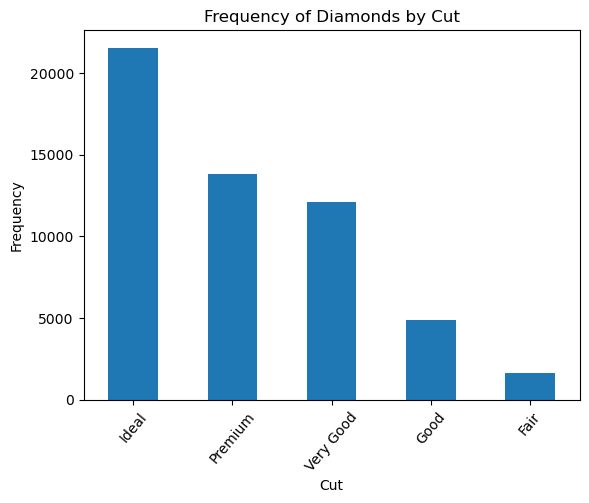

In [4]:
# find the frequency
cut_frequency = diamonds_df['cut'].value_counts()
# plot the frequency
cut_frequency.plot(kind='bar')
plt.title('Frequency of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Frequency')
plt.xticks(rotation=50)
plt.show()

The chart above displays the frequency of diamonds grouped by cut, where the cut is one of Fair, Good, Very Good, Premium, Ideal. Ideal has the greatest frequency by far at over 20000, followed by Premium and Very good following with over 10000. Good and Fair both fall under 5000. This shows that high quality cuts, like ideal and premium, are more common than low quality cuts, like good and fair.

## Carat vs Price: 
Create a scatterplot that shows the relationship between carat and price.


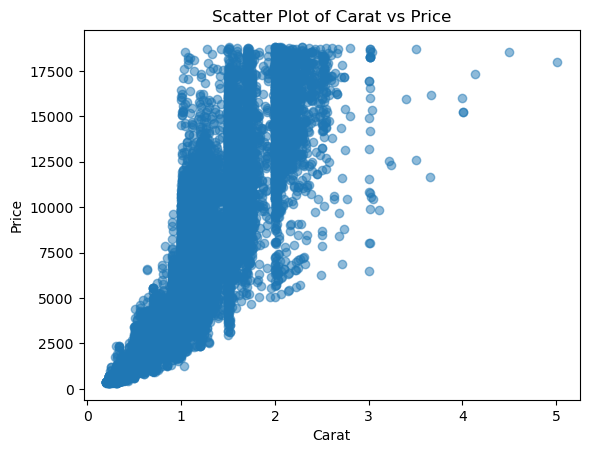

In [5]:
plt.scatter(diamonds_df['carat'], diamonds_df['price'], alpha=0.5)
plt.title('Scatter Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

The scatterplot shows an overall positive relationship between carat and price. As the carat increases, the price increases as well, suggesting that larger diamonds are more expensive, which seems reasonable. There are some points that don't seem to perfectly follow the rest, implying that other factors could have an impact on price, like color or cut.

## Pearson Correlation of Carat vs Price:
Calculate the Pearson Correlation coefficient of carat and price.


In [6]:
corr, p_value = scipy.stats.pearsonr(diamonds_df['carat'],diamonds_df['price'])
print("Pearson Correlation Coefficient between carat and price: ", corr)
print("The p-value is: ", p_value)

Pearson Correlation Coefficient between carat and price:  0.9215913011935642
The p-value is:  0.0


The pearson correlation is very close to 1, or a perfect positive relationship. At 0.92, the correlation is very strongly positive. Since the p-value is less than the significance level (0.0 < 0.05), the null hypothesis is rejected. This means there is strong evidence of a relationship between carat and price, and this relationship is a positive one.

## Distribution of Price by Cut:
Create a histogram that shows the distribution of prices based on the quality of the cut.


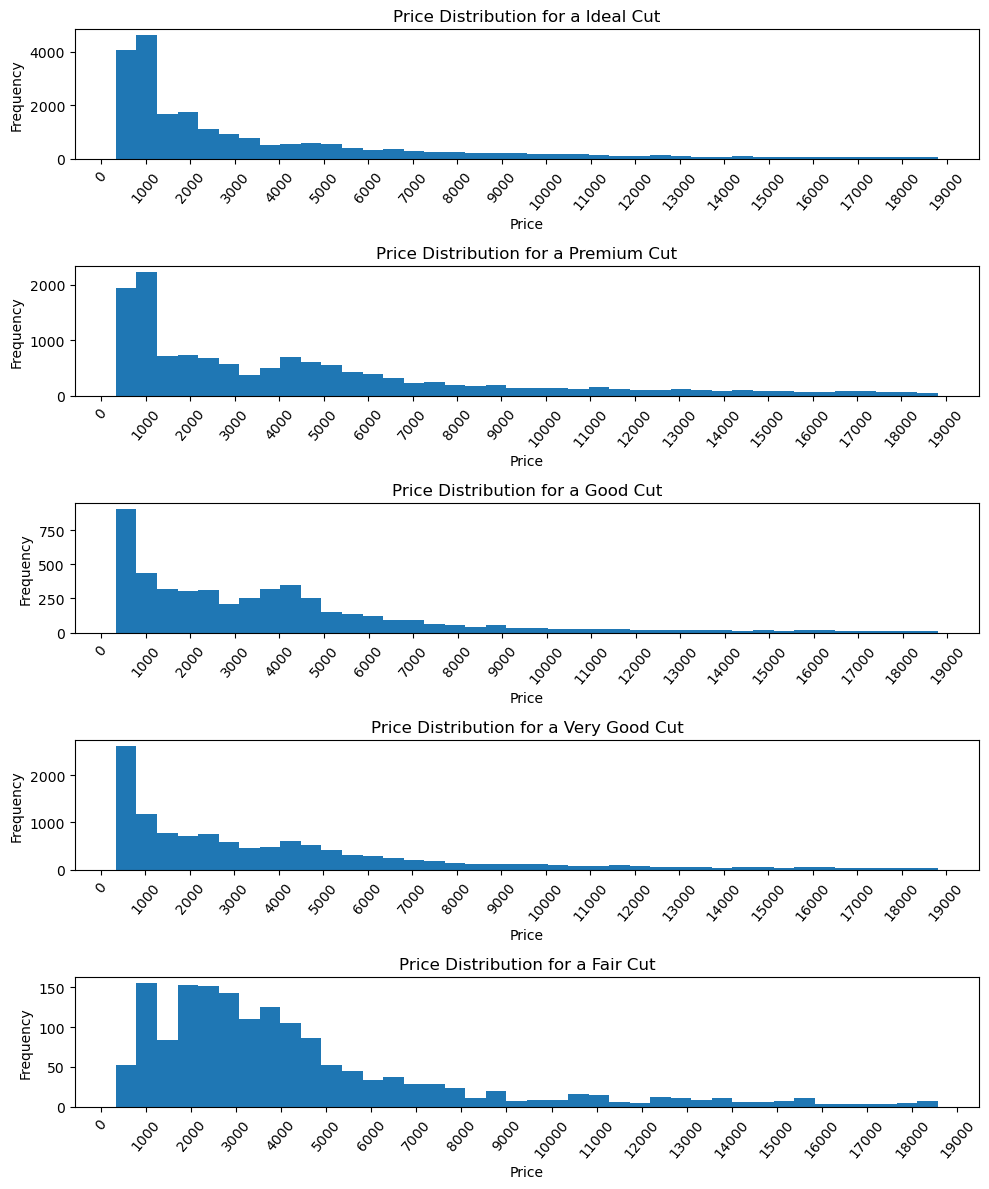

In [7]:
cuts = diamonds_df['cut'].unique()
fig, axes = plt.subplots(nrows=len(cuts), ncols=1, figsize=(10, 12))

# create a histogram for each cut
for i in range(len(cuts)):
    cut = cuts[i]
    subset = diamonds_df[diamonds_df['cut'] == cut]
    axes[i].hist(subset['price'], bins=40)
    axes[i].set_title('Price Distribution for a ' + str(cut) + ' Cut')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
    price_max = subset['price'].max()
    axes[i].set_xticks(range(0, int(price_max) + 1000, 1000))
    axes[i].tick_params(axis='x', rotation=50)

plt.tight_layout()
plt.show()

Here, each x-axis represents the price and the y-axis represents the frequency for the specified type of cut, demonstrating the distribution of prices based on the quality of the cut. Overall, the distribution is fairly similar for each cut, with the highest concentration typically occuring on or before 1000. An outlier to this is fair cuts, which have a frequency of over 100 for $2000-4000, unlike the rest of the cuts. Premium and Good cuts, and less so Very Good cuts, also have a slight increase in frequency at around 4000 dollars. In terms of skewing, Premium and Good cut are positively skewed, while Very Good and Fair are also positively skewed but less so. For most diamond cuts, a majority of diamonds are affordable or moderately priced, with a smaller proportion of more expensive diamonds.

## Good vs Very Good and Premium vs Ideal:
Using a 2-sample t-test, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
* 'Good' vs 'Very Good'
* 'Premium' vs 'Ideal'



In [8]:
# good vs very good
good_prices = diamonds_df[diamonds_df['cut'] == 'Good']['price']
very_good_prices = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']
t_good, p_value_good = ttest_ind(good_prices, very_good_prices, equal_var=False)

# premium vs ideal
premium_prices = diamonds_df[diamonds_df['cut'] == 'Premium']['price']
ideal_prices = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']
t_stat_pi, p_value_pi = ttest_ind(premium_prices, ideal_prices, equal_var=False)

print("T-test for Good vs Very Good cuts: t-statistic = " + str(t_good) + ", p-value = " + str(p_value_good))
print("T-test for Premium vs Ideal cuts: t-statistic = " + str(t_stat_pi) + ", p-value = " + str(p_value_pi))

T-test for Good vs Very Good cuts: t-statistic = -0.8316937711271452, p-value = 0.40560235704721637
T-test for Premium vs Ideal cuts: t-statistic = 24.917867628750415, p-value = 1.718904661909504e-135


If the null hypothesis is that the mean prices of diamonds in the two groups are equal, then p-value is less than 0.05 (the given significance level), the null hypothesis can be rejected and it can be concluded that there is a statistically significant difference between the two cuts. For Good vs Very Good cuts, the p-value is greater than the given alpha (0.4 > 0.05), so it fails to reject the null hypothesis, demonstrating that there is no statistically significant difference between the prices of diamonds with a "Good" cut and a "Very Good" cut. The t-statistic is negative, but not large, so the means of the groups are similar. For Premium vs Ideal cuts, the p-value is significantly smaller than the alpha (1.718904661909504e-135 < 0.05). This means null hypothesis is rejected, showing that there is a statistically significant difference between the prices of "Premium" cut and "Ideal" cut diamonds. The t-statistic, 24.92, is large and positive, which implies that the mean price of Premium cut diamonds is higher than the mean price of Ideal cut diamonds.

## Skewed Results:

In the 'distribution of prices based on the quality of the cut' analysis, Ideal cut and Premium cut were the most positively skewed. One technique that can be used to hangle this skewed data is taking the log of the price

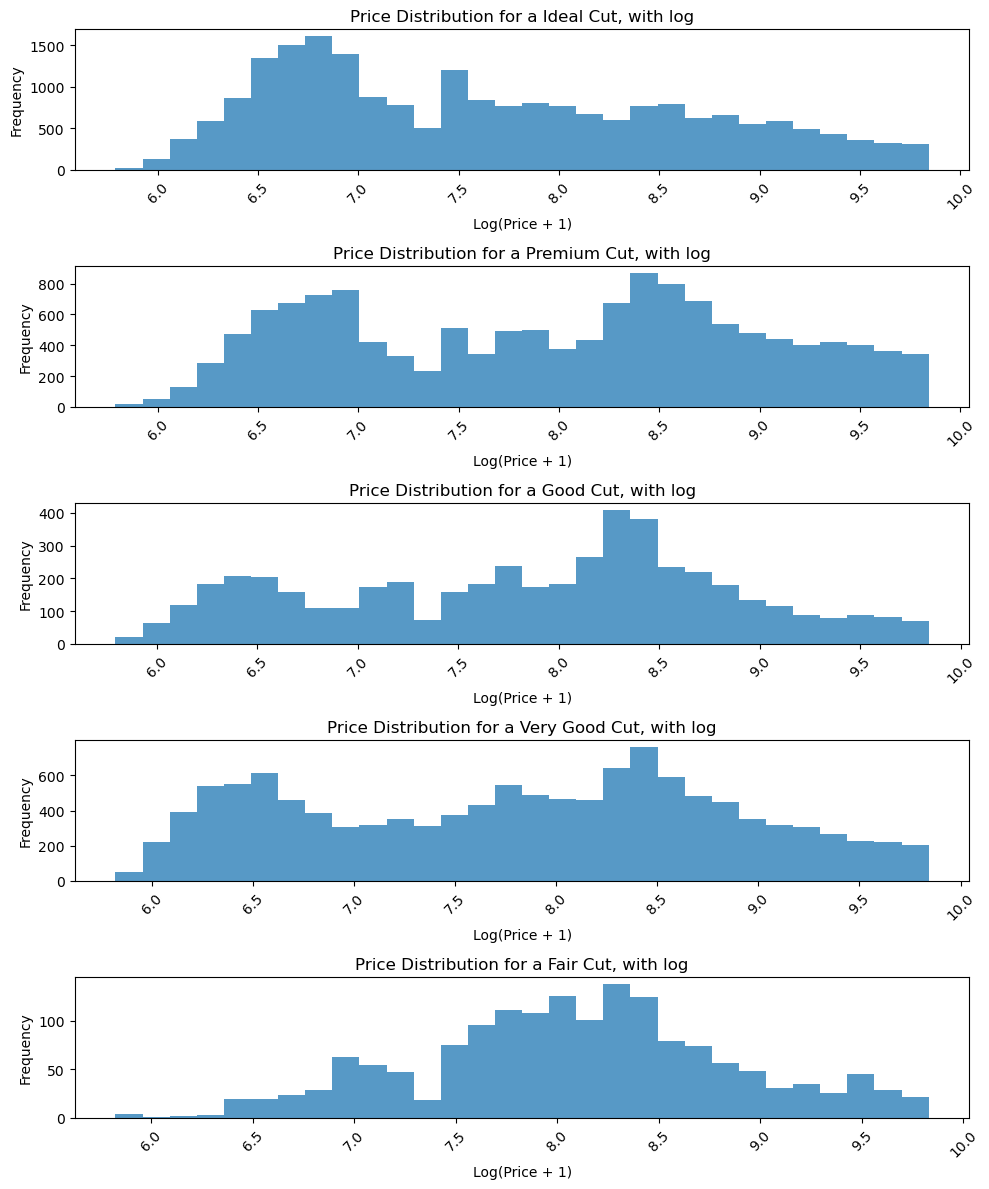

In [9]:
# apply log to the diamond price
diamonds_df['log_price'] = np.log(diamonds_df['price'] + 1)
cuts = diamonds_df['cut'].unique()
fig, axes = plt.subplots(nrows=len(cuts), ncols=1, figsize=(10, 12))

# create a histogram for each cut
for i in range(len(cuts)):
    cut = cuts[i]
    subset = diamonds_df[diamonds_df['cut'] == cut]
    axes[i].hist(subset['log_price'], bins=30, alpha=0.75)
    axes[i].set_title('Price Distribution for a ' + str(cut) + ' Cut, with log')
    axes[i].set_xlabel('Log(Price + 1)')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The log transformation reveals some new patterns in the data that were not as clear before. The price for the ideal cut is signficantly more commonly lower than other cuts with a frequency of about 1500. On the other end of the spectrum, while Fair cut diamonds appear to be more expensive, with the majority of the distribution appearing after 7.5, the actual frequency is significantly lower with just under 200 at its highest at around 8.3. Other cuts follow a pattern of speaking at the bottom range of prices and just after the middle range of prices with frequencies under 1000.

In [10]:
# apply the same for 'Good vs Very Good and Premium vs Ideal'
good_prices = diamonds_df[diamonds_df['cut'] == 'Good']['log_price']
very_good_prices = diamonds_df[diamonds_df['cut'] == 'Very Good']['log_price']
t_good, p_value_good = ttest_ind(good_prices, very_good_prices, equal_var=False)

premium_prices = diamonds_df[diamonds_df['cut'] == 'Premium']['log_price']
ideal_prices = diamonds_df[diamonds_df['cut'] == 'Ideal']['log_price']
t_stat_pi, p_value_pi = ttest_ind(premium_prices, ideal_prices, equal_var=False)

print("T-test for Good vs Very Good cuts: t-statistic = " + str(t_good) + ", p-value = " + str(p_value_good))
print("T-test for Premium vs Ideal cuts: t-statistic = " + str(t_stat_pi) + ", p-value = " + str(p_value_pi))

T-test for Good vs Very Good cuts: t-statistic = 2.6116734329534905, p-value = 0.009024100697824958
T-test for Premium vs Ideal cuts: t-statistic = 28.114084163776983, p-value = 1.429694524471508e-171


There are changes in the statistical significance. For Good vs Very Good cuts, the p-value is greater than the given alpha (0.009 > 0.05), null hypothesis is rejected, showing that there is a statistically significant difference between the prices "Good" cut and a "Very Good" cut, unlike before in the previous question 7 analysis. This change implies that skewness in the original price data was hiding the differences. The t-statistic is positive now, but not large, so the means of the groups are similar. For Premium vs Ideal cuts, the p-value is still significantly smaller than the alpha (1.429694524471508e-171 < 0.05). This means null hypothesis is rejected, showing that there is a statistically significant difference between the prices of "Premium" cut and "Ideal" cut diamonds. The t-statistic, 28.11, is still large and positive, despite increasing a bit, which implies that the mean price of Premium cut diamonds is higher than the mean price of Ideal cut diamonds.